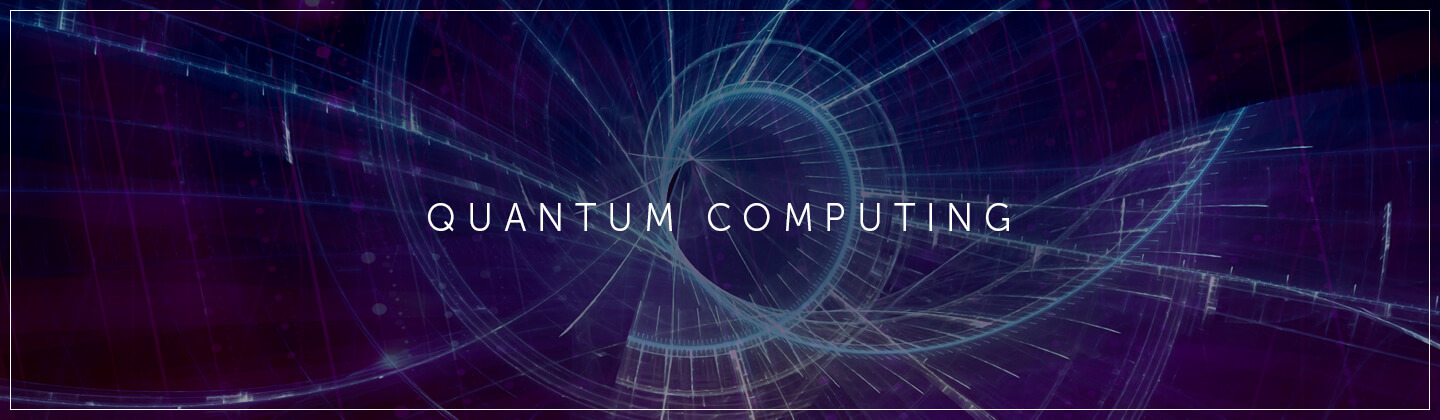
<font><br/></font>
<h1><center>Quantum computing with continuous variables</center></h1>

<div align="right" font-size=15px>
  <font><br/></font>
  <font size="4"> Hayk Sargsyan <br/></font>
  <font size="3"><i> Gate42 quantum computing lab </i><br/></font>
  <font size="3"><i> Yerevan State University </i><br/></font>
  <font><br/></font>
  <font><br/></font>
  <font><br/></font>
  <font><br/></font>
  <font><br/></font>
</div>

<h1><center> Why quantum? </center></h1>

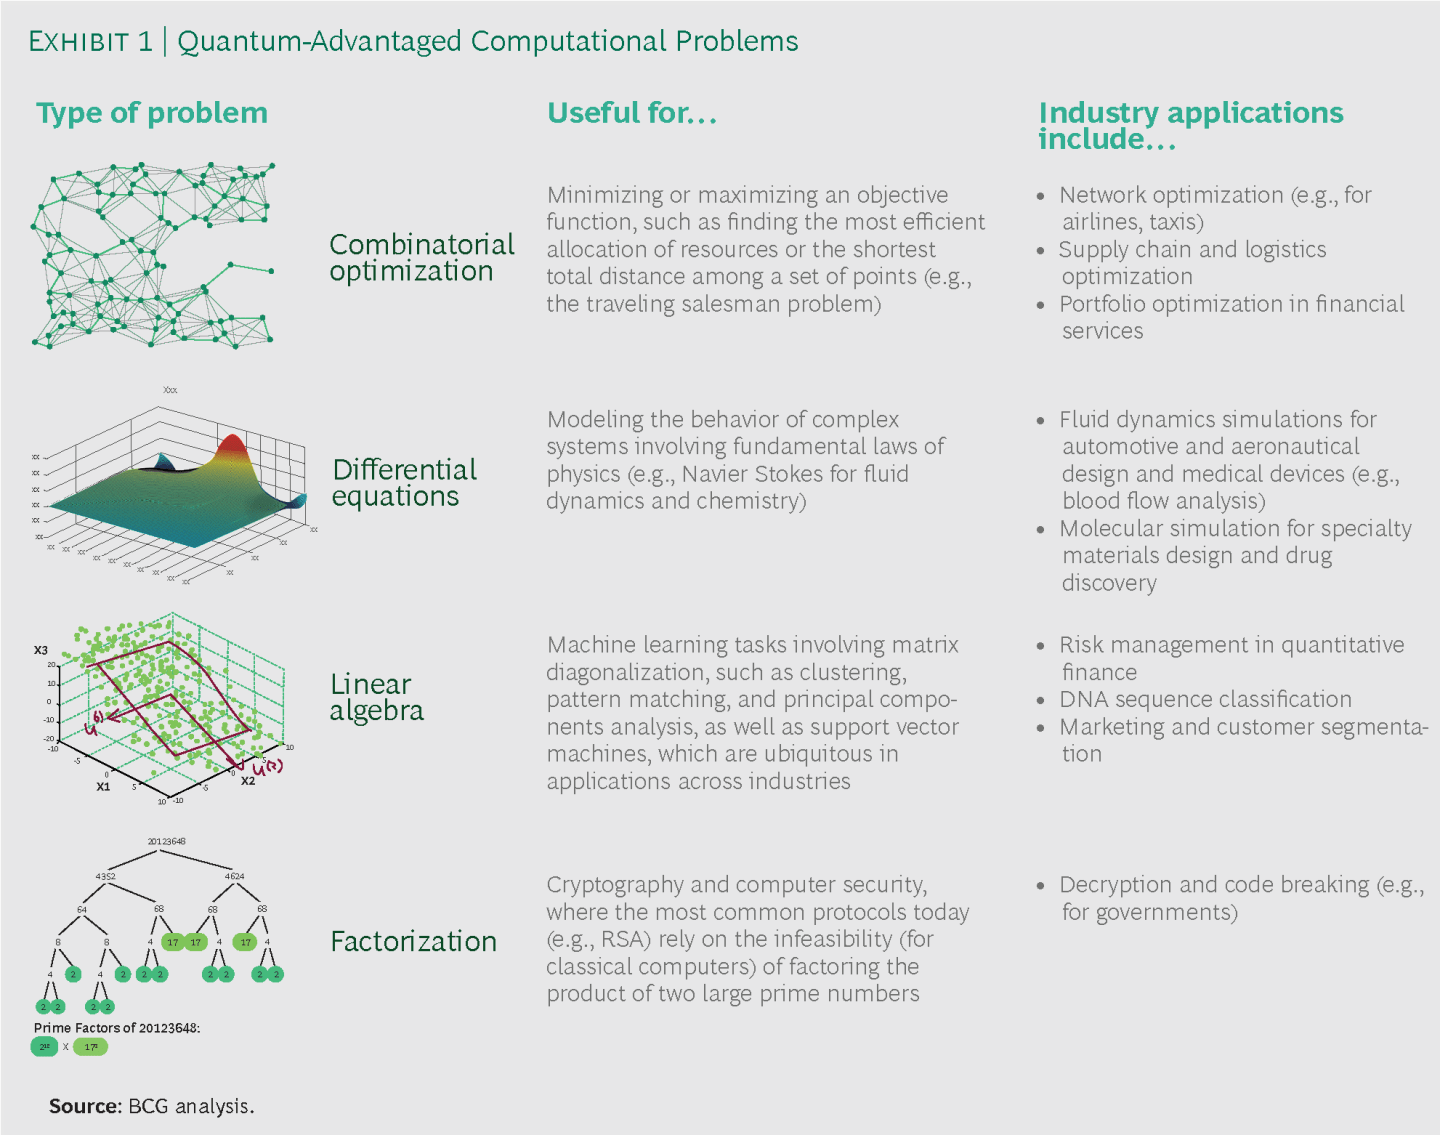

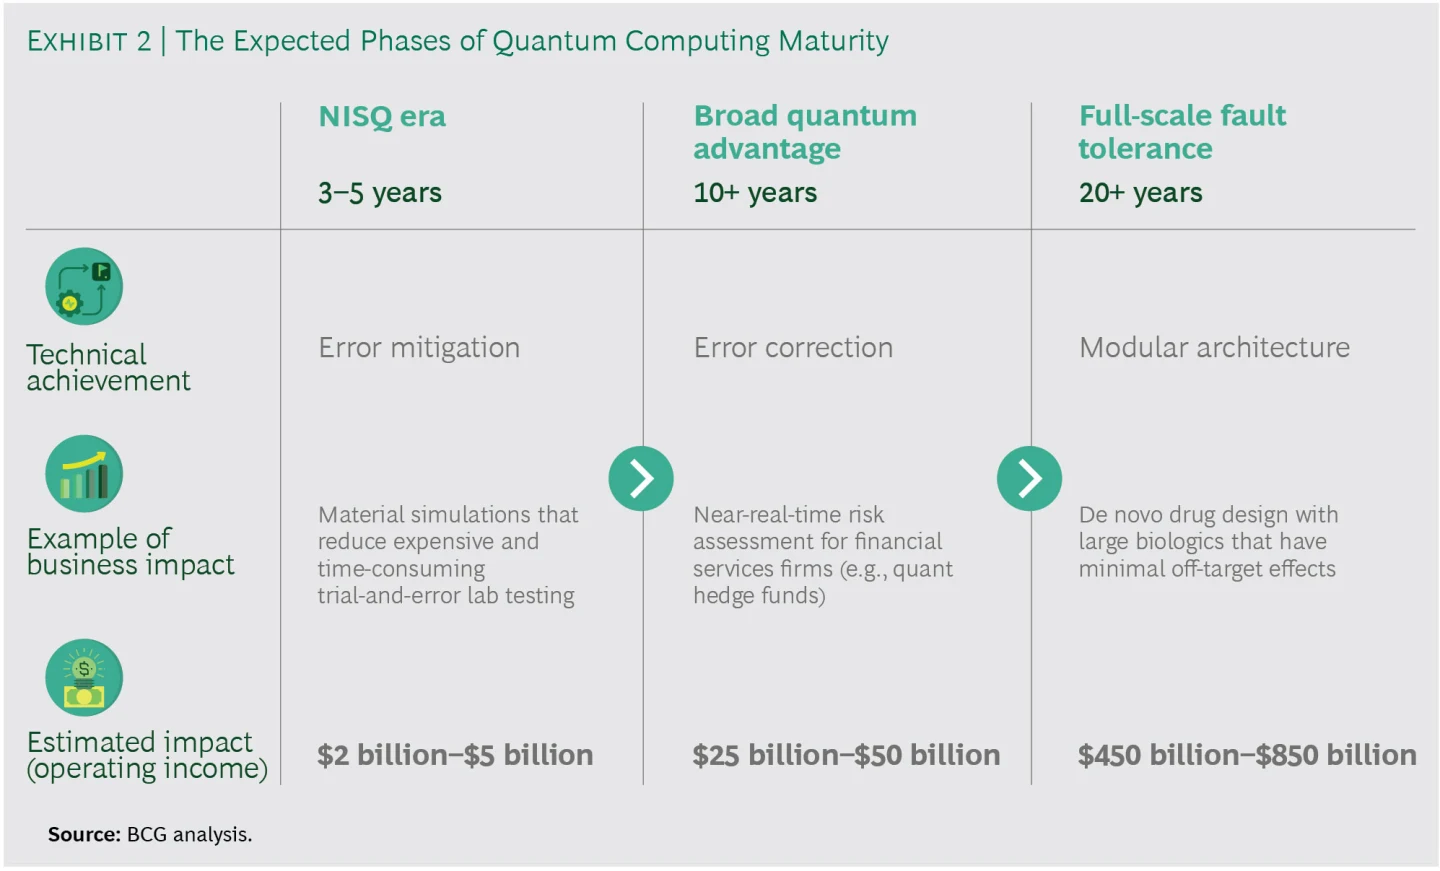

<h1><center> What is quantum computing? </center></h1>

* Computation in general: abstraction of physical quantities/states into mathematical quantities with predefined interpretation rules.
* Quantum computing: use quantum objects (e.g. atoms, electrons, photons, etc.), and take advantage of the laws of quantum physics.
* INITIALIZE -> MANIPULATE -> MEASURE
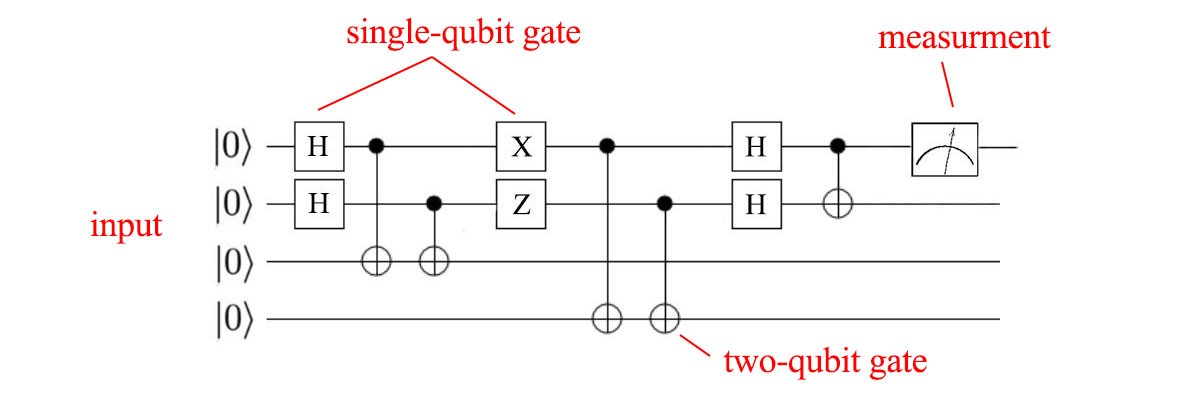
* Speedup #1 - superposition: $\alpha |0\rangle + \beta |1\rangle$, where $|\alpha|^2 + |\beta|^2=1$ (typical example: Deutsch–Jozsa algorithm)
* Speedup #2 - entanglement: $\frac{1}{\sqrt{2}}(\vert 01\rangle \pm \vert 10\rangle)$ (typical example: State teleportation)
* Universality?

<h1><center> Quantum computing with continuous variables </center></h1>

* Let's take a look at an operator $\hat{x}$ with continuous spectrum (e.g. coordinate). We denote by $\hat{p}$ its conjugate operator (e.g. momentum). 
* Commutation relation: $[\hat{x},\hat{p}]=i\hbar$. Uncertainty principle: $\Delta x\Delta p \gt \frac{\hbar}{2}$
* Eigenstates of $\hat{x}$ and $\hat{p}$ are Fourier transform connected:
$$|p\rangle=\frac{1}{\sqrt{2\pi \hbar}}\int e^{-\frac{i}{\hbar}px} |x\rangle dx$$
$$|x\rangle=\frac{1}{\sqrt{2\pi \hbar}}\int e^{\frac{i}{\hbar}px} |p\rangle dp$$
* Provides tools for floating point algebra
* Displacement operator along x: $\hat{X}(r)=e^{-\frac{i}{\hbar}r\hat{p}}$, and along p: $\hat{Z}(r)=e^{\frac{i}{\hbar}r\hat{x}}$
$$\hat{X}(r)\vert x\rangle = \vert x+r\rangle$$
$$\hat{Z}(r)\vert p\rangle = \vert p+r\rangle$$

<h1><center> Implementation in quantum optics </center></h1>

* Decomposition of the field into plane waves:
$$\textbf{E}=\sum_{\textbf{k},\lambda=1,2}\left(\textbf{e}_{\lambda} a_{k,\lambda} e^{i(\textbf{kr}-\omega_k t)} + \textbf{e}_{\lambda} a_{k,\lambda}^* e^{-i(\textbf{kr}-\omega_k t)}\right) $$
* In quantum optics $a_{k,\lambda}$ and $a_{k,\lambda}^*$ become operators $\hat{a}_{k,\lambda}$ and $\hat{a}_{k,\lambda}^{\dagger}$, with the commutatuion relation $[\hat{a}_{k,\lambda},\hat{a}_{k^{\prime},\lambda^{\prime}}^{\dagger}]=\delta_{k,k^{\prime}}\delta_{\lambda,\lambda^{\prime}}$. They are the creation and anihilation operators of the corresponding mode.
* Hamiltonian: $$\hat{H}=\sum_{\textbf{k},\lambda=1,2}\frac{\hbar\omega_{k}}{2}\left(\hat{a}_{k,\lambda}^{\dagger}\hat{a}_{k,\lambda} + \hat{a}_{k,\lambda}\hat{a}_{k,\lambda}^{\dagger}\right)=\sum_{\textbf{k},\lambda=1,2}\hbar\omega_{k}\left(\frac{1}{2}+\hat{a}_{k,\lambda}^{\dagger}\hat{a}_{k,\lambda}\right)$$
* The quadrature operators: $\hat{x} \sim \left(\hat{a}_{k,\lambda} + \hat{a}_{k,\lambda}^{\dagger}\right) $ and $\hat{p} \sim i\left(\hat{a}_{k,\lambda} - \hat{a}_{k,\lambda}^{\dagger}\right) $
$$\hat{H} = \frac{1}{2}\sum_{\textbf{k},\lambda=1,2}\left(\hat{p}^2 + \omega^2 x^2\right)$$
* Modes of electric field:
$$E=E_0\left(\hat{x}\cos(\textbf{kr}-\omega t)+\hat{p}\sin(\textbf{kr}-\omega t)\right)$$
* $\hat{x}$ and $\hat{p}$ can be measured with homodyne detection

<font><br/></font>
<font><br/></font>
<font><br/></font>

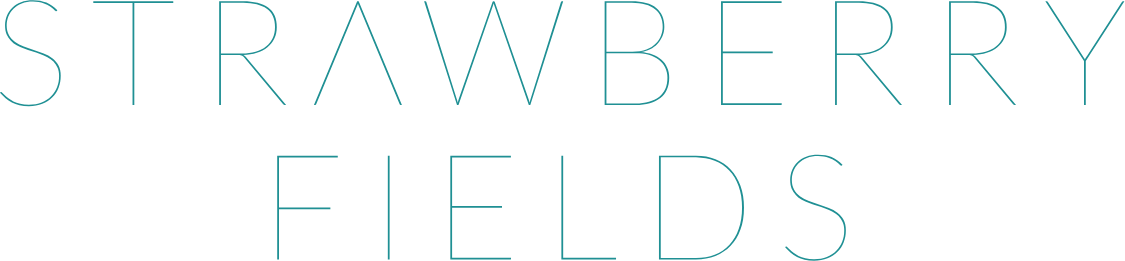

* XANADU - Strawberry Fields (https://strawberryfields.readthedocs.io/en/stable/index.html#)

In [1]:
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Vacuum state: ###

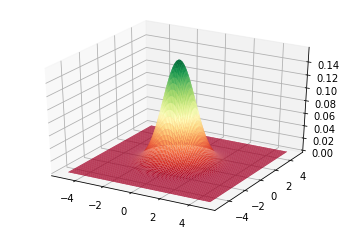

In [4]:
eng, q = sf.Engine(1)

with eng:
    Vac | q[0]
state = eng.run('gaussian')

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
#plt.contourf(X, P, Z)

### Displacement gate: ###
$$ D(\alpha) = e^{\alpha \hat{a}^{\dagger} - \alpha^* \hat{a}} $$
$$ D^{\dagger}(\alpha) \hat{x} D(\alpha) = \hat{x} + \sqrt{2\hbar}Re(\alpha) $$
$$ D^{\dagger}(\alpha) \hat{p} D(\alpha) = \hat{p} + \sqrt{2\hbar}Im(\alpha) $$

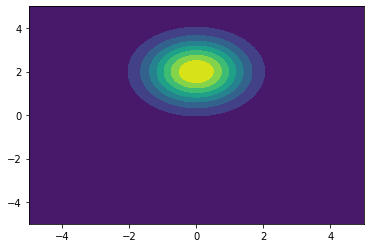

In [3]:
eng, q = sf.Engine(1)

with eng:
    Dgate(np.complex(0,1)) | q[0]
state = eng.run('gaussian')
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
#ax = fig.add_subplot(111, projection="3d")
#ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
plt.contourf(X, P, Z)

### Squeezing gate: ###
$$ S(z) = e^{\frac{1}{2}(z^*\hat{a}^2 - z{\hat{a}^{\dagger}}^2)}, \quad z=re^{i\phi} $$
$$ S^{\dagger}(z) \hat{x} S(z) = e^{-r}\hat{x} $$
$$ S^{\dagger}(z) \hat{p} S(z) = e^{r}\hat{p} $$

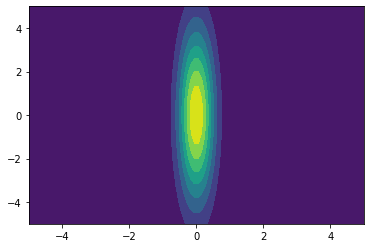

In [8]:
eng, q = sf.Engine(1)

with eng:
    Sgate(np.complex(1,0)) | q[0]
state = eng.run('gaussian')
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
#ax = fig.add_subplot(111, projection="3d")
#ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
plt.contourf(X, P, Z)

## Beamsplitter: ##

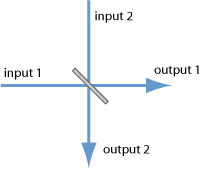

$$ \left(\begin{array}{c}\hat{a}_3\\ \hat{a}_4\end{array}\right)=\begin{bmatrix}\cos{\theta} & -e^{-i\phi}\sin{\theta} \\ e^{i\phi}\sin{\theta} & \cos{\theta} \end{bmatrix} \left(\begin{array}{c}\hat{a}_1\\ \hat{a}_2\end{array}\right) $$

## Homodyne measurement: ##

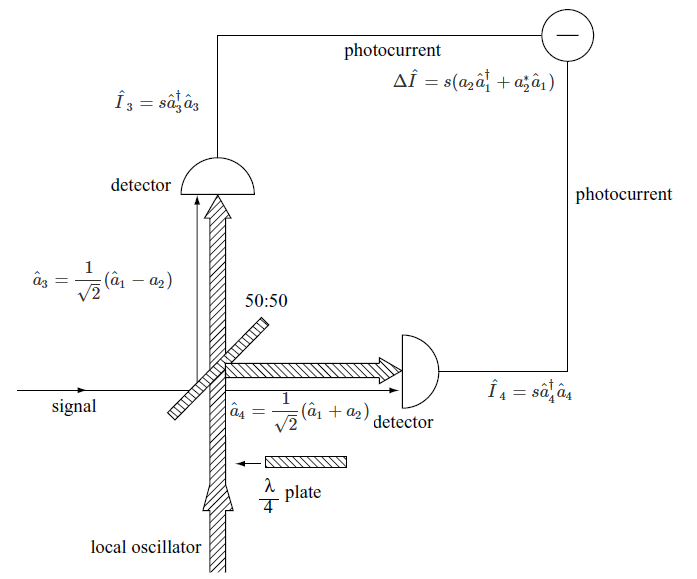

In [28]:
eng, q = sf.Engine(2)

with eng:
    Vac | q[0]
    Sgate(3) | q[1]
    
    MeasureX | q[0]
    MeasureX | q[1]
state = eng.run('gaussian')

print(q[0].val)
print(q[1].val)

-1.723584952871953
-5.054892881728431


### Adding numbers: ###

In [31]:
eng, q = sf.Engine(2)

with eng:
    # prepare the initial states
    Sgate(1) | q[0]
    Sgate(1) | q[1]
    
    Xgate(1) | q[0]
    Xgate(2) | q[1]
    
    CXgate(1) | (q[0], q[1])  
    
    MeasureX | q[1]

state = eng.run('gaussian')
q[1].val

2.233242011529957